02_05_02_Challenge_Validating_linear_regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## import ny data and clean

In [2]:
df_ny = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

In [3]:
df_ny

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN


In [4]:
# drop non data rows
df_ny.drop([0, 1, 2], axis=0, inplace = True)

In [5]:
df_ny

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1


In [6]:
# move the column names from the 1sr row to the column header
df_ny.columns = df_ny.iloc[0]

In [7]:
df_ny

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
8,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
9,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
10,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
11,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
12,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1


In [13]:
# remove the 3 from the column header???
del df_ny.index.name 

In [9]:
# remove column names from the data
df_ny.drop([3], axis=0, inplace = True)
df_ny = df_ny.reset_index(drop=True)

In [14]:
df_ny

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN
5,Alfred Village,4089,5,0,NaN,0,3,2,46,10,36,0,NaN
6,Allegany Village,1781,3,0,NaN,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,NaN,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,NaN,0,12,18,405,99,291,15,0


In [15]:
# removenon data columns at the end
df_ny.drop([348, 349, 350], axis=0, inplace = True)

df_ny

In [17]:
df_ny.rename(columns={ df_ny.columns[0]: "city" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[1]: "population" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[2]: "violent_crime" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[3]: "murder_nonnegligent_manslaughter" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[4]: "rape_rev1" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[5]: "rape_legacy" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[6]: "robbery" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[7]: "aggravated_assult" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[8]: "property_crime" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[9]: "burglary" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[10]: "larceny_theft" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[11]: "motor_vehicle_theft" }, inplace=True)
df_ny.rename(columns={ df_ny.columns[12]: "arson3" }, inplace=True)

In [18]:
# remove entire column that is all NaN
df_ny.drop(['rape_rev1'], axis=1, inplace = True)

In [19]:
# fill in remaining NaN with 0
df_ny = df_ny.fillna(0)

In [20]:
# change the data types
df_ny['population'] = df_ny['population'].astype('Int64')
df_ny['violent_crime'] = df_ny['violent_crime'].astype('Int64')
df_ny['murder_nonnegligent_manslaughter'] = df_ny['murder_nonnegligent_manslaughter'].astype('Int64')
df_ny['rape_legacy'] = df_ny['rape_legacy'].astype('Int64')
df_ny['robbery'] = df_ny['robbery'].astype('Int64')
df_ny['aggravated_assult'] = df_ny['aggravated_assult'].astype('Int64')
df_ny['property_crime'] = df_ny['property_crime'].astype('Int64')
df_ny['burglary'] = df_ny['burglary'].astype('Int64')
df_ny['larceny_theft'] = df_ny['larceny_theft'].astype('Int64')
df_ny['motor_vehicle_theft'] = df_ny['motor_vehicle_theft'].astype('Int64')
df_ny['arson3'] = df_ny['arson3'].astype('Int64')

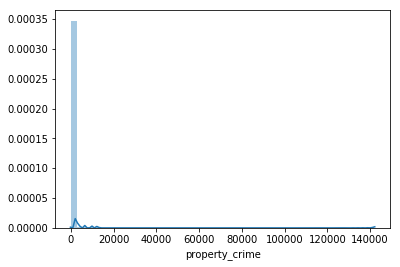

In [21]:
# look at the distribution of value we want to predict
# not normaly distributed???
sns.distplot(df_ny['property_crime'])

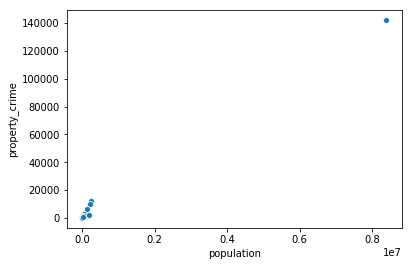

In [22]:
# population is guessed to be a large indicator of property_crime
sns.scatterplot(x="population", y="property_crime", data=df_ny)
plt.show()

### population outlier
there is a major outlier where population is much greater for one city compared to the others.

In [23]:
df_ny.sort_values('population', ascending=False)

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434,0
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957,0
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609,132
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394,57
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0
126,Greece Town,96667,151,0,9,60,82,2303,332,1925,46,0
267,Ramapo Town,87204,57,2,5,9,41,567,88,466,13,0
57,Clarkstown Town,80705,65,0,8,17,40,1515,99,1388,28,0


In [24]:
# remove the outlier
df_ny.drop(216, inplace=True)

In [25]:
df_ny

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,0
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0


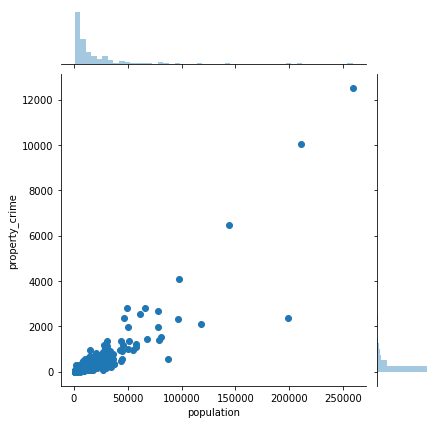

In [85]:
# look at the relationship of population to property crime after
# the outlier has been removed
sns.jointplot(x="population", y="property_crime", data=df_ny)
plt.show()

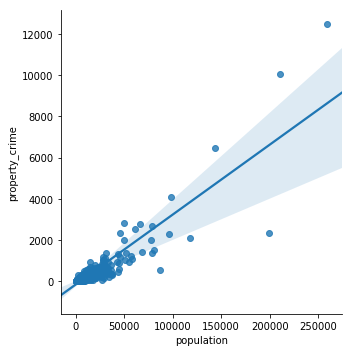

In [86]:
# data looks linear
sns.lmplot(x="population", y="property_crime", data=df_ny)

## create a linear regression model

In [59]:
df_ny.columns

Index(['city', 'population', 'violent_crime',
       'murder_nonnegligent_manslaughter', 'rape_legacy', 'robbery',
       'aggravated_assult', 'property_crime', 'burglary', 'larceny_theft',
       'motor_vehicle_theft', 'arson3'],
      dtype='object', name=3)

In [60]:
# features
X = df_ny[['population', 'violent_crime','murder_nonnegligent_manslaughter', 'rape_legacy', 'robbery', 'aggravated_assult', 'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3']]

In [62]:
# target
y = df_ny['property_crime']

In [63]:
from sklearn.cross_validation import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()

In [67]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
print(lm.intercept_)

-1.0800249583553523e-12


This intercept tells us, if there are no other crimes, property_crime is expected to be -1.0800249583553523e-12

In [69]:
lm.coef_

array([ 6.22564659e-17, -3.59712260e-14, -5.18023124e-14, -6.49064136e-14,
        4.64905892e-14,  3.28626015e-14,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -2.16614920e-14])

In [83]:
# create a dataframe from the coeffecients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

In [84]:
coeff_df

,Coeff
3,
population,6.225647e-17
violent_crime,-3.597123e-14
murder_nonnegligent_manslaughter,-5.180231e-14
rape_legacy,-6.490641e-14
robbery,4.649059e-14
aggravated_assult,3.286260e-14
burglary,1.000000e+00
larceny_theft,1.000000e+00
motor_vehicle_theft,1.000000e+00


with all other units fixed, a one unit increase in population is associated with an increase of 6.225647e-17 in property_crime 

### predictions

In [74]:
predictions = lm.predict(X_test)

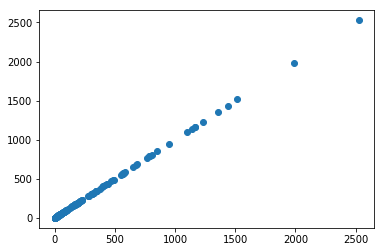

In [75]:
# results are extremly linear
plt.scatter(y_test, predictions)

### metrics

In [77]:
from sklearn import metrics

### mean absolute error
* mean of the absolute value of the errors
* simplty the average amount the numbers are off by

In [78]:
metrics.mean_absolute_error(y_test, predictions)

7.951896930564729e-13

### mean squared error
* mean of the squared errors
* squaring the errors emphasises larger errors as being more problamatic
* because it is squared it is difficult to compare to the original data

In [79]:
metrics.mean_squared_error(y_test, predictions)

1.0943222492969487e-24

### root mean squared error
* square root of the mean squared errors
* punishes larger errors
* but brings the value back down so it can be interpreted in terms of y

In [90]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.0460985848843066e-12

### R^2
* measurement of how much variance the model explaines

In [107]:
ny_r2 = metrics.explained_variance_score(y_test, predictions)

In [108]:
ny_r2

1.0

### cross-validation 

In [99]:
from sklearn.model_selection import cross_val_score

In [101]:
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-1.32017771e-24 -5.08754953e-25 -5.09428347e-25 -1.94371339e-25
 -6.42230150e-25 -6.11362809e-26 -3.94525246e-25 -2.54463457e-24
 -4.10739469e-25 -7.35945029e-24]


In [102]:
mse_scores = scores*-1

In [109]:
# convert MSE to RMSE
ny_rmse_scores = np.sqrt(mse_scores)
print(ny_rmse_scores)

[1.14898986e-12 7.13270603e-13 7.13742494e-13 4.40875650e-13
 8.01392632e-13 2.47257519e-13 6.28112447e-13 1.59519108e-12
 6.40889592e-13 2.71283068e-12]


In [111]:
print(ny_rmse_scores.mean())

9.64255255467054e-13


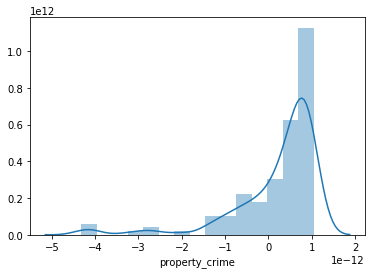

In [89]:
sns.distplot((y_test-predictions))

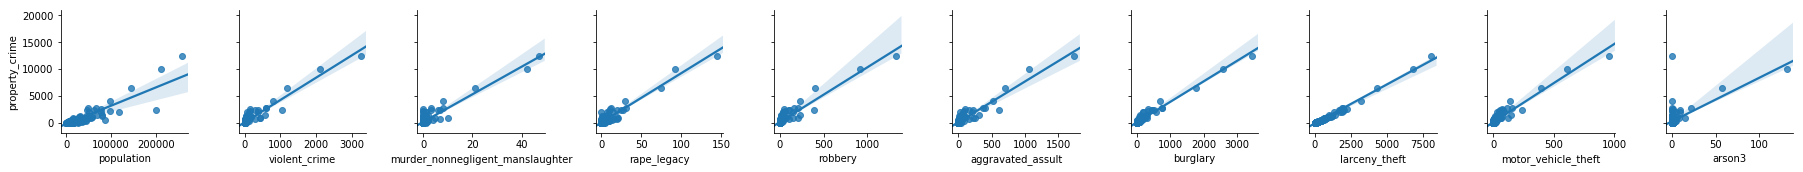

In [97]:
sns.pairplot(df_ny, x_vars=X.columns, y_vars='property_crime', kind='reg')

## statsmodels

In [112]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [114]:
linear_formula = 'property_crime ~ population+violent_crime+murder_nonnegligent_manslaughter+rape_legacy+robbery+aggravated_assult+burglary+larceny_theft+motor_vehicle_theft+arson3'

In [115]:
sts_lm = smf.ols(formula=linear_formula, data=df_ny).fit()

In [125]:
sts_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property_crime   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.659e+30
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:01:25   Log-Likelihood:                 8543.6
No. Observations:                 347   AIC:                        -1.707e+04
Df Residuals:                     337   BIC:                        -1.703e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         2.416e-13   3.47e-13      0.696      0.487   -4.41e-13    9.25e-13
population                       -2.862e-17   2.82e-17     -1.016      0.311   -8.41e-17    2.68e-17
violent_crime                    -7.105e-15   6.89e-14     -0.103      0.918   -1.43e-13    1.28e-13
murder_nonnegligent_manslaughter  5.684e-14   3.19e-13      0.178      0.859    -5.7e-13    6.84e-13
rape_legacy                       1.776e-15    1.5e-13      0.012      0.991   -2.93e-13    2.96e-13
robbery                          -1.776e-14   8.33e-14     -0.213      0.831   -1.82e-13    1.46e-13
aggravated_assult                -1.954e-14   6.78e-14     -0.288      0.773   -1.53e-13    1.14e-13
burglary                             1.0000   8.57e-15   1.17e+14      0.000       1.000       1.000
larceny_theft                        1.0000   1.85e-15   5.41e+14      0.000       1.000       1.000
motor_vehicle_theft                  1.0000   3.51e-14   2.85e+13      0.000       1.000       1.000
arson3                           -2.487e-14   5.55e-14     -0.448      0.654   -1.34e-13    8.42e-14
==============================================================================
Omnibus:                      562.586   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132125.626
Skew:                           8.929   Prob(JB):                         0.00
Kurtosis:                      96.912   Cond. No.                     7.00e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.99e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

burglary, larceny_theft , motor_vehicle_theft all have perfect p-values of 0. 

all the other features have p-values greater than 0.05, suggesting their removal would not decrease the models predicting power

## a revised sklearn regression model

In [120]:
# revised features
X_rev = df_ny[['burglary', 'larceny_theft', 'motor_vehicle_theft']]

X_train_rev, X_test_rev, y_train, y_test = train_test_split(X_rev, y, test_size=0.4, random_state=101)
lm_rev = LinearRegression()

lm_rev.fit(X_train_rev, y_train)

predictions_rev = lm_rev.predict(X_test_rev)

metrics.mean_absolute_error(y_test, predictions_rev)

3.167841688407783e-13

In [121]:
metrics.mean_absolute_error(y_test, predictions)

7.951896930564729e-13

both modelsare very accurate, but using statsmodels, we can find the p-values of the features.  using only features with p-values less than 0.05 produce a better model.

### testing the revised model on a new data set

In [126]:
df_or = pd.read_excel('table_8_offenses_known_to_law_enforcement_oregon_by_city_2013.xls')

In [127]:
df_or

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,OREGON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
4,Albany,51645,40,0,NaN,8,27,5,2019,252,1625,142,6
5,Amity,1624,1,0,1,NaN,0,0,26,1,25,0,1
6,Ashland,20455,33,0,5,NaN,7,21,674,76,585,13,10
7,Astoria,9543,33,0,NaN,3,1,29,445,89,324,32,3
8,Athena,1144,1,0,1,NaN,0,0,25,5,19,1,0
9,Aumsville,3738,6,0,0,NaN,1,5,82,20,59,3,0


In [128]:
df_or.drop([0, 1, 2], axis=0, inplace = True)
df_or.columns = df_or.iloc[0]
df_or.drop([3], axis=0, inplace = True)
df_or = df_ny.reset_index(drop=True)
df_or.drop([113, 114], axis=0, inplace = True)

In [129]:
df_or

3,city,population,violent_crime,murder_nonnegligent_manslaughter,rape_legacy,robbery,aggravated_assult,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0,0
6,Allegany Village,1781,3,0,0,0,3,10,0,10,0,0
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32,3
8,Amityville Village,9519,9,0,2,4,3,210,16,188,6,1
9,Amsterdam,18182,30,0,0,12,18,405,99,291,15,0


In [130]:
df_or.rename(columns={ df_ny.columns[0]: "city" }, inplace=True)
df_or.rename(columns={ df_ny.columns[1]: "population" }, inplace=True)
df_or.rename(columns={ df_ny.columns[2]: "violent_crime" }, inplace=True)
df_or.rename(columns={ df_ny.columns[3]: "murder_nonnegligent_manslaughter" }, inplace=True)
df_or.rename(columns={ df_ny.columns[4]: "rape_legacy" }, inplace=True)
df_or.rename(columns={ df_ny.columns[5]: "robbery" }, inplace=True)
df_or.rename(columns={ df_ny.columns[6]: "aggravated_assult" }, inplace=True)
df_or.rename(columns={ df_ny.columns[7]: "property_crime" }, inplace=True)
df_or.rename(columns={ df_ny.columns[8]: "burglary" }, inplace=True)
df_or.rename(columns={ df_ny.columns[9]: "larceny_theft" }, inplace=True)
df_or.rename(columns={ df_ny.columns[10]: "motor_vehicle_theft" }, inplace=True)
df_or.rename(columns={ df_ny.columns[11]: "arson3" }, inplace=True)

In [131]:
df_ny = df_ny.fillna(0)

In [132]:
df_or['population'] = df_or['population'].astype('Int64')
df_or['violent_crime'] = df_or['violent_crime'].astype('Int64')
df_or['murder_nonnegligent_manslaughter'] = df_or['murder_nonnegligent_manslaughter'].astype('Int64')
df_or['rape_legacy'] = df_or['rape_legacy'].astype('Int64')
df_or['robbery'] = df_or['robbery'].astype('Int64')
df_or['aggravated_assult'] = df_or['aggravated_assult'].astype('Int64')
df_or['property_crime'] = df_or['property_crime'].astype('Int64')
df_or['burglary'] = df_or['burglary'].astype('Int64')
df_or['larceny_theft'] = df_or['larceny_theft'].astype('Int64')
df_or['motor_vehicle_theft'] = df_or['motor_vehicle_theft'].astype('Int64')
df_or['arson3'] = df_or['arson3'].astype('Int64')

In [142]:
# revised features with new data
X_rev_2 = df_or[['burglary', 'larceny_theft', 'motor_vehicle_theft']]
y_2 = df_or['property_crime']

predictions_rev_2 = lm_rev.predict(X_rev_2)



In [145]:
metrics.mean_absolute_error(y_2, predictions_rev_2)

3.354096388713937e-13

In [141]:
# original features with new data
X_2 = df_or[['population', 'violent_crime','murder_nonnegligent_manslaughter', 'rape_legacy', 'robbery', 'aggravated_assult', 'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3']]

predictions_2 = lm.predict(X_2)

or_r2 = metrics.explained_variance_score(y_2, predictions_2)

In [146]:
metrics.mean_absolute_error(y_2, predictions_2)

9.799619540949177e-13

## results
The linear model was trained and tested using data from New York.  The model tested very well with the data from New York.  Statsmodels showed that there were 3 features with low p-values that could very accuratly be used alone to make predictions.  Changing the model to use only these 3 features decresed the error.

When the same model (trained with data from New York) was used to make predictions on a different set of data (from Oregon) the model continued to work very well.  The error was very low, although not as low as it was when testing on the same data used for training.  

Just like when testing data from New York, using the revised model with fewer features made better predictions on the data from Oregon.  